In [1]:
from scipy.stats import pearsonr
import pickle
import numpy as np
import matplotlib
import matplotlib.path as mplPath
import matplotlib.pyplot as plt
import os
import math
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors


name = '2025_02_06_15_05_110SAC'#'2024_11_04_16_24_37' #'2024_06_11_15_11_25' 
env_name = 'myoTorsoReachFixed-v1'
steps = 700
cut = 100

pkl_path = './output/PKL/' + env_name + '/'
ep = 100


def load_pickle(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

image_path = './image/' + env_name + '/' + name
os.makedirs(image_path, exist_ok=True)

In [2]:
stand, stand_80, stand_60, stand_40 = [], [], [], []
for i in range(ep):
    file_path = pkl_path + name+f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height[-1] > 0.5:
        filtered_data = {
            'modelInfo': data['modelInfo'],
            'jointInfo':data['jointInfo']
        }
        stand.append(filtered_data)

In [3]:
name_80 = '2025_02_10_13_44_020SAC'#'2025_01_24_00_17_040SAC'#'2024_11_04_16_24_37' #'2024_06_11_15_11_25' 
name_60 = '2025_02_11_09_54_530SAC'#'2025_01_24_22_03_170SAC'
name_40 = '2025_02_12_00_04_090SAC' #'2025_01_25_12_05_250SAC'
env_name = 'myoSarcTorsoReachFixed-v1'
pkl_path = './output/PKL/' + env_name + '/'

In [4]:
for i in range(ep):
    file_path = pkl_path + name_80 +f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height[-1] > 0.5:
        filtered_data = {
            'modelInfo': data['modelInfo'],
            'jointInfo':data['jointInfo']
        }
        stand_80.append(filtered_data)


for i in range(ep):
    file_path = pkl_path + name_60 +f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height[-1] > 0.5:
        filtered_data = {
            'modelInfo': data['modelInfo'],
            'jointInfo':data['jointInfo']
        }
        stand_60.append(filtered_data)

for i in range(ep):
    file_path = pkl_path + name_40 +f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height[-1] > 0.5:
        filtered_data = {
            'modelInfo': data['modelInfo'],
            'jointInfo':data['jointInfo']
        }
        stand_40.append(filtered_data)

In [5]:
def torque_value(stand_dict):
    pert = []
    a_c, h_c = [], []
    j = 20
    for data in stand_dict:
        p_t = int(data['modelInfo']['perturbationTime']*100)
        pert.append(max(abs(arr[0]) for arr in data['jointInfo']['qacc']['slide_joint'][p_t: p_t+20]))
        ankle_torques = np.mean([data['jointInfo']['qtau']['ankle_angle_r'][p_t:] ,data['jointInfo']['qtau']['ankle_angle_l'][p_t:]], axis = 0)
        knee_torques = np.mean([data['jointInfo']['qtau']['knee_angle_r'][p_t:] ,data['jointInfo']['qtau']['knee_angle_l'][p_t:]], axis = 0) 
        ankle_correlation_coefficient = []
        for i in range(len(ankle_torques) - j):
            ankle_correlation_coefficient.append(pearsonr(ankle_torques[i:i+j].flatten(), knee_torques[i:i+j].flatten()))
        a_c.append(np.min(ankle_correlation_coefficient))
        hip_correlation_coefficient = []
        hip_torques = np.mean([data['jointInfo']['qtau']['hip_flexion_r'][p_t:] ,data['jointInfo']['qtau']['hip_flexion_l'][p_t:]], axis = 0)
        for i in range(len(hip_torques) - j):
            hip_correlation_coefficient.append(pearsonr(hip_torques[i:i+j].flatten(), knee_torques[i:i+j].flatten()))
        h_c.append(np.min(hip_correlation_coefficient))
    return pert, a_c, h_c

In [12]:
def torque_value_2(stand_dict):
    pert = []
    a_c, h_c = [], []
    j = 1
    for data in stand_dict:
        p_t = int(data['modelInfo']['perturbationTime']*100)
        pert.append(max(abs(arr[0]) for arr in data['jointInfo']['qacc']['slide_joint'][p_t: p_t+20]))
        ankle_torques = np.mean([data['jointInfo']['qtau']['ankle_angle_r'][p_t:] ,data['jointInfo']['qtau']['ankle_angle_l'][p_t:]], axis = 0)
        knee_torques = np.mean([data['jointInfo']['qtau']['knee_angle_r'][p_t:] ,data['jointInfo']['qtau']['knee_angle_l'][p_t:]], axis = 0) 
        ankle_correlation_coefficient = []
        for i in range(len(ankle_torques) - j):
            ankle_correlation_coefficient.append(ankle_torques[i]*knee_torques[i])
        a_c.append(np.min(ankle_correlation_coefficient))
        hip_correlation_coefficient = []
        hip_torques = np.mean([data['jointInfo']['qtau']['hip_flexion_r'][p_t:] ,data['jointInfo']['qtau']['hip_flexion_l'][p_t:]], axis = 0)
        for i in range(len(hip_torques) - j):
            hip_correlation_coefficient.append(hip_torques[i]* knee_torques[i])
        h_c.append(np.min(hip_correlation_coefficient))
    return pert, a_c, h_c

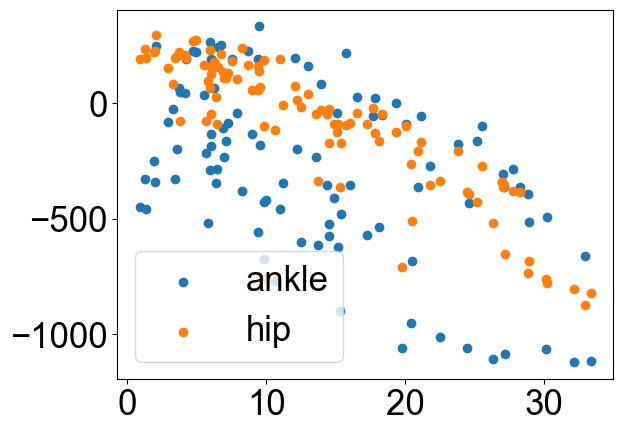

In [13]:
pert_mag_h, a_c_h, h_c_h = torque_value_2(stand)
plt.scatter(pert_mag_h, a_c_h, label = 'ankle')
plt.scatter(pert_mag_h, h_c_h, label = 'hip')
plt.legend()
plt.show()

#plt.plot(pert_mag,h_c)
#plt.show()

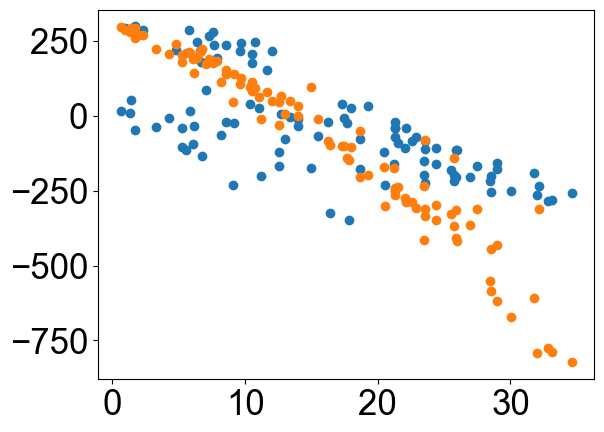

In [14]:
pert_mag_80, a_c_80, h_c_80 = torque_value_2(stand_80)
plt.scatter(pert_mag_80, a_c_80)
plt.scatter(pert_mag_80, h_c_80)
plt.show()

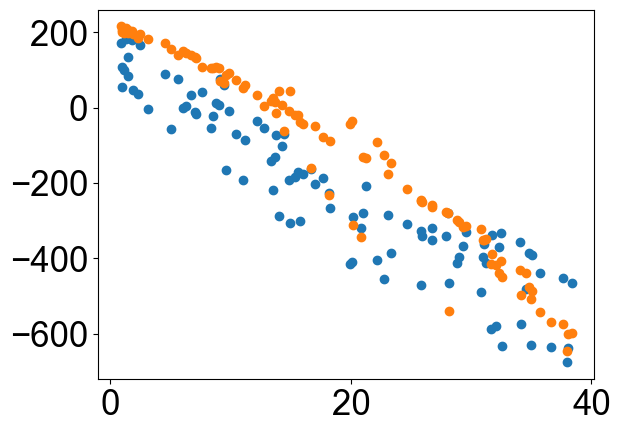

In [15]:
pert_mag_60, a_c_60, h_c_60 = torque_value_2(stand_60)
plt.scatter(pert_mag_60, a_c_60)
plt.scatter(pert_mag_60, h_c_60)
plt.show()

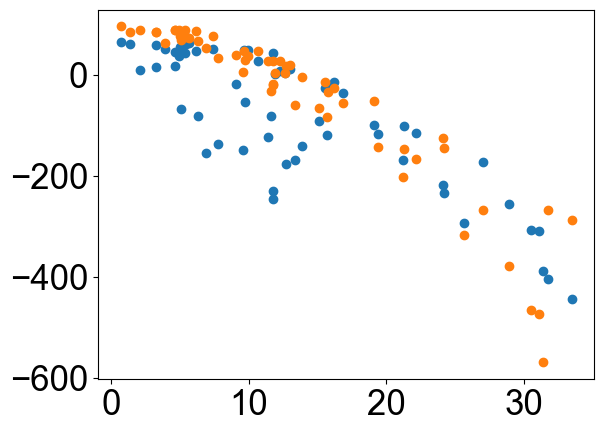

In [16]:
pert_mag_40, a_c_40, h_c_40 = torque_value_2(stand_40)
plt.scatter(pert_mag_40, a_c_40)
plt.scatter(pert_mag_40, h_c_40)
plt.show()

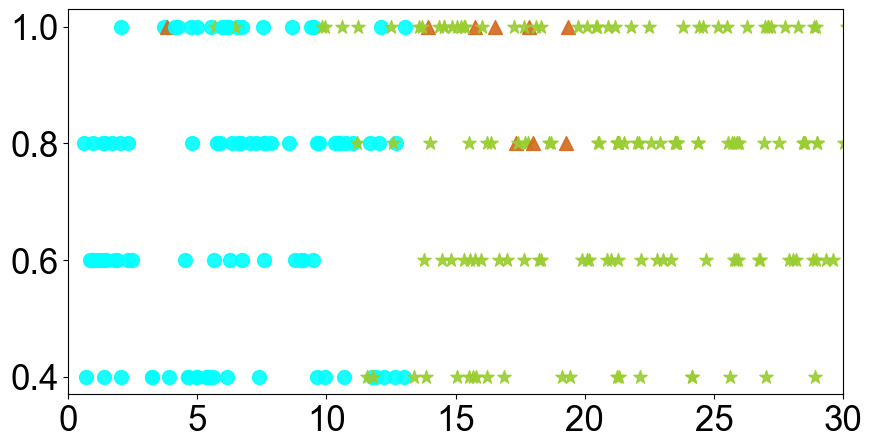

In [20]:
plt.rcParams.update({
    "font.family": "Arial",  # specify font family here
    "font.size":25}) 
plt.figure(figsize=(10, 5))


for i in range(len(a_c_h)):
    if h_c_h[i] > 0 and a_c_h[i] > 0:
        plt.scatter( pert_mag_h[i] ,1, marker='o', color='aqua', s = 100,alpha = 0.9)  # Circle for z > 0
    elif h_c_h[i] < 0 and a_c_h[i] > 0:
        plt.scatter(pert_mag_h[i]  ,1,marker='^', color='chocolate', s = 100,alpha = 0.9)  # Triangle for z <= 0
    elif h_c_h[i] < 0 and a_c_h[i] < 0:
        plt.scatter(pert_mag_h[i]  ,1,marker='*', color='yellowgreen', s = 100,alpha = 0.9)  # Triangle for z <= 0

for i in range(len(a_c_h)):
    if h_c_80[i] > 0 and a_c_80[i] > 0:
        plt.scatter( pert_mag_80[i] ,0.8, marker='o', color='aqua', s = 100,alpha = 0.9)  # Circle for z > 0
    elif h_c_80[i] < 0 and a_c_80[i] > 0:
        plt.scatter(pert_mag_80[i]  ,0.8,marker='^', color='chocolate', s = 100,alpha = 0.9)  # Triangle for z <= 0
    elif h_c_80[i] < 0 and a_c_80[i] < 0:
        plt.scatter(pert_mag_80[i]  ,0.8,marker='*', color='yellowgreen', s = 100,alpha = 0.9)  # Triangle for z <= 0

for i in range(len(h_c_60)):
    if h_c_60[i] > 0 and a_c_60[i] > 0:
        plt.scatter( pert_mag_60[i] ,0.6, marker='o', color='aqua',s = 100, alpha = 0.9)  # Circle for z > 0
    elif h_c_60[i] < 0 and a_c_60[i] > 0:
        plt.scatter(pert_mag_60[i]  ,0.6,marker='^', color='chocolate', s = 100,alpha = 0.9)  # Triangle for z <= 0
    elif h_c_60[i] < 0 and a_c_60[i] < 0:
        plt.scatter(pert_mag_60[i]  ,0.6,marker='*', color='yellowgreen', s = 100,alpha = 0.9)  # Triangle for z <= 0

for i in range(len(h_c_40)):
    if h_c_40[i] > 0 and a_c_40[i] > 0:
        plt.scatter( pert_mag_40[i] ,0.4, marker='o', color='aqua', s = 100,alpha = 0.9)  # Circle for z > 0
    elif h_c_40[i] < 0 and a_c_40[i] > 0:
        plt.scatter(pert_mag_40[i]  ,0.4,marker='^', color='chocolate', s = 100, alpha = 0.9)  # Triangle for z <= 0
    elif h_c_40[i] < 0 and a_c_40[i] < 0:
        plt.scatter(pert_mag_40[i]  ,0.4 ,marker='*', color='yellowgreen', s = 100,alpha = 0.9)  # Triangle for z <= 0

plt.xlim([0, 30])
plt.show()


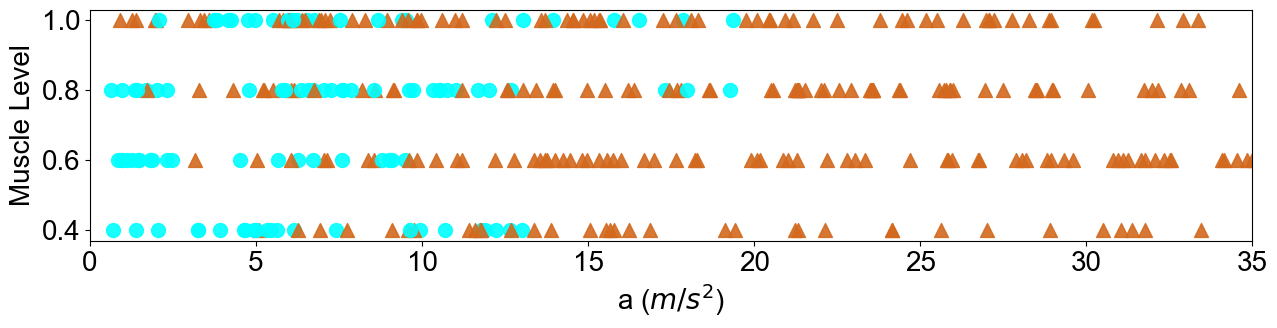

: 

In [ ]:
plt.rcParams.update({
    "font.family": "Arial",  # specify font family here
    "font.size":20}) 
plt.figure(figsize=(15, 3))


for i in range(len(a_c_h)):
    if a_c_h[i] > 0:
        plt.scatter( pert_mag_h[i] ,1, marker='o', color='aqua', s = 100,alpha = 0.9)  # Circle for z > 0
    else:
        plt.scatter(pert_mag_h[i]  ,1,marker='^', color='chocolate', s = 100,alpha = 0.9)  # Triangle for z <= 0

for i in range(len(a_c_h)):
    if a_c_80[i] > 0:
        plt.scatter( pert_mag_80[i] ,0.8, marker='o', color='aqua', s = 100,alpha = 0.9)  # Circle for z > 0
    else:
        plt.scatter(pert_mag_80[i]  ,0.8,marker='^', color='chocolate', s = 100,alpha = 0.9)  # Triangle for z <= 0

for i in range(len(h_c_60)):
    if a_c_60[i] > 0:
        plt.scatter( pert_mag_60[i] ,0.6, marker='o', color='aqua',s = 100, alpha = 0.9)  # Circle for z > 0
    else:
        plt.scatter(pert_mag_60[i]  ,0.6,marker='^', color='chocolate', s = 100,alpha = 0.9)  # Triangle for z <= 0
    
for i in range(len(h_c_40)):
    if a_c_40[i] > 0:
        plt.scatter( pert_mag_40[i] ,0.4, marker='o', color='aqua', s = 100,alpha = 0.9)  # Circle for z > 0
    else:
        plt.scatter(pert_mag_40[i]  ,0.4,marker='^', color='chocolate', s = 100, alpha = 0.9)  # Triangle for z <= 0

plt.xlim([0, 35])
plt.xlabel(r'a ($m/s^2$)')
plt.ylabel('Muscle Level')
plt.show()


In [ ]:
meta_healthy = metabolic(stand)
print(meta_healthy)
meta_80 = metabolic(stand_80)
meta_60 = metabolic(stand_60)
meta_40 = metabolic(stand_40)

[0.42784943282128746, 0.42805239441524845, 0.4284866425088094, 0.42772664545260314, 0.42959046562896835, 0.4278815670987314, 0.4275008417271122, 0.427749310621066, 0.42884256095027135, 0.4284613480092933, 0.42777018753077756, 0.4274702994046889, 0.4309251937246688, 0.42875842238364903, 0.42856227716414586, 0.4279094734524019, 0.4277332385577586, 0.42966380702220736, 0.4262945598457463, 0.427757522941693, 0.42622654292766454, 0.4277849716992294, 0.42779607156144445, 0.4277570004729575, 0.4373696650939216, 0.4277863640968285, 0.42937507646650075, 0.4287159642784271, 0.42773896847289045, 0.4279018677942869, 0.4277885749713717, 0.42772837029551447, 0.4279262649854431, 0.4267205028441812, 0.43110865394502085, 0.4277475898681598, 0.42834466367184837, 0.4322324291153625, 0.42909166260318965, 0.4289470525518459, 0.4290354860393327, 0.4276316004866063, 0.42775668019696045, 0.43126211047339275, 0.42791086747205154, 0.42966506605150473, 0.4277598558192908, 0.4292707212649676, 0.4260308193129701, 